In [1]:
from datetime import datetime
from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['font.family'] = ['Heiti TC']

name = '^HSI'

In [2]:
from_beginning = '1987-01-01'
start_date = from_beginning
df = yf.download(name, start=start_date)
df = df[['Adj Close']].copy()
df['Return %'] = df['Adj Close'].pct_change().fillna(0) * 100
df.rename(columns={'Adj Close': 'Price'}, inplace=True)

tian_gan: list[str] = ['甲', '乙', '丙', '丁', '戊', '己', '庚', '辛', '壬', '癸']
# len = 10
di_zhi: list[str] = ['寅', '卯', '辰', '巳', '午', '未', '申', '酉', '戌', '亥', '子', '丑']
# len = 12

dicts = {
    '寅': 0, 
    '卯': 1, 
    '辰': 2, 
    '巳': 3, 
    '午': 4, 
    '未': 5, 
    '申': 6, 
    '酉': 7, 
    '戌': 8, 
    '亥': 9,
    '子': 10, 
    '丑': 11, 
    }

[*********************100%%**********************]  1 of 1 completed


In [3]:
bazi_df = pd.read_csv('/Users/henrywzh/Documents/data/流年月日1900_2030.csv')
bazi_df.set_index('Date', inplace=True)
bazi_df.index = pd.to_datetime(bazi_df.index)

stock_bazi = pd.merge(left=bazi_df, right=df, left_index=True, right_index=True)
stock_bazi = stock_bazi.iloc[2:].copy()
stock_bazi['Unique Month'] = stock_bazi['月支'].map(dicts)
stock_bazi.sort_values(['Unique Year', 'Unique Month'])

,Year,Month,Day,日干,日支,月干,月支,年干,年支,Unique Year,Price,Return %,Unique Month
Date,,,,,,,,,,,,,
1987-01-06,1987,1,6,乙,卯,辛,丑,丙,寅,1986,2583.899902,1.234133,11
1987-01-07,1987,1,7,丙,辰,辛,丑,丙,寅,1986,2607.100098,0.897875,11
1987-01-08,1987,1,8,丁,巳,辛,丑,丙,寅,1986,2603.300049,-0.145758,11
1987-01-09,1987,1,9,戊,午,辛,丑,丙,寅,1986,2561.699951,-1.597976,11
1987-01-12,1987,1,12,辛,酉,辛,丑,丙,寅,1986,2614.899902,2.076744,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-08,2024,8,8,甲,辰,壬,申,甲,辰,2024,16891.830078,0.082775,6
2024-08-09,2024,8,9,乙,巳,壬,申,甲,辰,2024,17090.230469,1.174535,6
2024-08-12,2024,8,12,戊,申,壬,申,甲,辰,2024,17111.650391,0.125334,6


Change bazi_df to month freq

In [4]:
bazi_m = bazi_df.groupby(['Unique Year', '月支']).last().reset_index().drop(columns=['Day', 'Year', 'Month'])
bazi_m['Unique Month'] = bazi_m['月支'].map(dicts)
bazi_m = bazi_m.sort_values(['Unique Year', 'Unique Month'])
bazi_m

,Unique Year,月支,日干,日支,月干,年干,年支,Unique Month
1,1899,子,戊,寅,丙,己,亥,10
0,1899,丑,丁,未,丁,己,亥,11
7,1900,寅,丁,丑,戊,庚,子,0
5,1900,卯,丁,未,己,庚,子,1
12,1900,辰,戊,寅,庚,庚,子,2
...,...,...,...,...,...,...,...,...
1570,2030,申,乙,巳,甲,庚,戌,6
1572,2030,酉,乙,亥,乙,庚,戌,7
1568,2030,戌,丙,午,丙,庚,戌,8
1562,2030,亥,乙,亥,丁,庚,戌,9


group data by 月支

In [5]:
stock_bazi.groupby(['Unique Year', 'Unique Month'])['Price'].first().reset_index()

,Unique Year,Unique Month,Price
0,1986,11,2583.899902
1,1987,0,2636.600098
2,1987,1,2798.600098
3,1987,2,2664.699951
4,1987,3,2792.899902
...,...,...,...
447,2024,2,16723.919922
448,2024,3,18578.300781
449,2024,4,18476.800781
450,2024,5,17524.060547


In [6]:
open_df = stock_bazi.groupby(['Unique Year', 'Unique Month'])['Price'].first().reset_index().rename(columns={'Price': 'Open'})
high = stock_bazi.groupby(['Unique Year', 'Unique Month'])['Price'].max().reset_index()
low = stock_bazi.groupby(['Unique Year', 'Unique Month'])['Price'].min().reset_index()
close = stock_bazi.groupby(['Unique Year', 'Unique Month'])['Price'].last().reset_index()
df_m = open_df
df_m['High'] = high['Price']
df_m['Low'] = low['Price']
df_m['Close'] = close['Price']
df_m['Return %'] = (df_m['Close'] / df_m['Open'] - 1) * 100

merged_df = pd.merge(bazi_m, df_m, on=['Unique Year', 'Unique Month'])
merged_df

,Unique Year,月支,日干,日支,月干,年干,年支,Unique Month,Open,High,Low,Close,Return %
0,1986,丑,癸,未,辛,丙,寅,11,2583.899902,2614.899902,2449.899902,2606.399902,0.870777
1,1987,寅,癸,丑,壬,丁,卯,0,2636.600098,2939.100098,2636.600098,2798.399902,6.136684
2,1987,卯,癸,未,癸,丁,卯,1,2798.600098,2831.500000,2629.300049,2680.000000,-4.237837
3,1987,辰,甲,寅,甲,丁,卯,2,2664.699951,2785.500000,2589.500000,2713.800049,1.842613
4,1987,巳,乙,酉,乙,丁,卯,3,2792.899902,3064.300049,2785.600098,3064.300049,9.717504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2024,辰,己,巳,戊,甲,辰,2,16723.919922,18475.919922,16224.139648,18475.919922,10.476013
448,2024,巳,庚,子,己,甲,辰,3,18578.300781,19636.220703,18079.609375,18424.960938,-0.825371
449,2024,午,辛,未,庚,甲,辰,4,18476.800781,18476.800781,17716.470703,17799.609375,-3.665090
450,2024,未,癸,卯,辛,甲,辰,5,17524.060547,18293.380859,16647.339844,16877.859375,-3.687508


In [7]:
table1 = merged_df.groupby('月干').describe()['Return %']
table1.index.name = '月干收益率'
table1['mean / std'] = table1['mean'] / table1['std']
round(table1, 4)

,count,mean,std,min,25%,50%,75%,max,mean / std
月干收益率,,,,,,,,,
丁,45.0,0.1278,7.0449,-15.2305,-5.8557,-0.8496,4.4188,22.0121,0.0181
丙,45.0,0.4481,5.5141,-18.4197,-1.8784,0.2830,4.4326,8.5020,0.0813
乙,45.0,0.5849,6.9058,-17.6190,-3.2514,0.9264,5.1275,19.5806,0.0847
壬,46.0,2.3657,7.5960,-12.1079,-1.2819,2.1350,5.3666,27.7125,0.3114
己,45.0,-0.0070,8.4871,-35.9461,-3.2034,0.6636,4.9173,15.9661,-0.0008
庚,45.0,-0.3221,10.5843,-45.5569,-3.6651,-0.0522,5.7883,14.8144,-0.0304
戊,45.0,0.8616,6.1410,-12.5178,-2.9647,0.6120,5.1913,16.9726,0.1403
甲,45.0,1.2744,6.6621,-16.0580,-2.5436,1.1589,3.4460,24.9707,0.1913
癸,45.0,-0.1810,5.0569,-11.2434,-4.2108,0.1589,3.6925,9.1742,-0.0358


Conclusion (For Hang Seng Index Only):
1. 壬(Water) Month Performs the best
2. 甲(Wood)，辛(Gold) Months Also performs well
3. Interestingly, 癸(Water)，庚(Gold) Months Perform the worst

In [8]:
table2 = merged_df.groupby('月支').describe()['Return %']
table2.index.name = '月支收益率'
table2['mean / std'] = table2['mean'] / table2['std']
round(table2, 4)

,count,mean,std,min,25%,50%,75%,max,mean / std
月支收益率,,,,,,,,,
丑,38.0,0.3892,6.6419,-17.6190,-3.8730,1.2757,4.4430,12.2637,0.0586
亥,37.0,1.0516,7.1872,-15.9511,-3.5465,1.1436,3.5179,19.5806,0.1463
午,38.0,0.4294,5.5004,-12.2053,-2.5282,-0.3287,4.6598,11.9590,0.0781
卯,38.0,0.1356,6.2653,-15.7624,-2.0573,0.5397,3.0661,22.0121,0.0216
子,37.0,2.0628,7.5632,-12.1079,-2.8842,0.8998,5.1368,26.8246,0.2727
寅,38.0,0.4413,6.5153,-18.4197,-2.8065,1.3525,5.1007,12.5441,0.0677
巳,38.0,0.0618,8.8097,-35.9461,-2.5720,-0.0148,6.0523,12.7468,0.0070
戌,37.0,1.3065,11.6355,-45.5569,-0.2094,2.0101,6.2812,27.7125,0.1123
未,38.0,0.8075,7.1173,-16.8846,-5.0357,1.0791,6.1199,14.0693,0.1135


Conclusion (For Hang Seng index Only):
1. 辰(April)，子(December) Months Perform the best
2. 巳(May) Month Performs the worst

Change bazi_df to year freq

In [9]:
bazi_y = bazi_df.groupby('Unique Year').last().reset_index()[['Unique Year', '年干', '年支']]
bazi_y

,Unique Year,年干,年支
0,1899,己,亥
1,1900,庚,子
2,1901,辛,丑
3,1902,壬,寅
4,1903,癸,卯
...,...,...,...
127,2026,丙,午
128,2027,丁,未
129,2028,戊,申
130,2029,己,酉


In [10]:
open_df = df_m.groupby('Unique Year')['Open'].first().reset_index()
high = df_m.groupby('Unique Year')['High'].max().reset_index()
low = df_m.groupby('Unique Year')['Low'].min().reset_index()
close = df_m.groupby('Unique Year')['Close'].last().reset_index()

df_y = open_df
df_y['High'] = high['High']
df_y['Low'] = low['Low']
df_y['Close'] = close['Close']
df_y['Return %'] = (df_y['Close'] / df_y['Open'] - 1) * 100

merged_df = pd.merge(bazi_y, df_y, on='Unique Year')
_df = merged_df.iloc[1:].copy()

Group by 流年天干/地支

In [11]:
table1 = _df.groupby('年干').describe()['Return %']
table1.index.name = '年干收益率'
table1['mean / std'] = table1['mean'] / table1['std']
round(table1, 4)

,count,mean,std,min,25%,50%,75%,max,mean / std
年干收益率,,,,,,,,,
丁,4.0,6.1382,28.0111,-22.3119,-13.6025,3.6160,23.3567,39.6327,0.2191
丙,3.0,23.3192,7.9310,17.1280,18.8494,20.5708,26.4148,32.2588,2.9403
乙,3.0,11.9175,34.1656,-23.0479,-4.7351,13.5778,29.4002,45.2227,0.3488
壬,4.0,2.5656,17.9043,-13.6398,-12.3002,1.3448,16.2105,21.2124,0.1433
己,4.0,26.8041,43.2039,-14.7477,-8.0632,26.3930,61.2603,69.1780,0.6204
庚,4.0,10.8377,8.6070,-0.9701,7.1559,13.3920,17.0738,17.5370,1.2592
戊,4.0,-8.8966,34.5458,-48.9579,-22.2746,-10.9742,2.4038,35.3200,-0.2575
甲,4.0,-2.4655,24.4765,-38.4837,-7.1646,6.9340,11.6332,14.7539,-0.1007
癸,4.0,28.2024,58.7452,-26.8050,-11.9248,17.2537,57.3810,105.1073,0.4801


Conclusion:
1. 丙年 Performs the best (Sharpe Ratio 2.94)
2. 庚年 Performs the second best (Sharpe Ratio 1.26)

In [12]:
table2 = _df.groupby('年支').describe()['Return %']
table2.index.name = '年支收益率'
table2['mean / std'] = table2['mean'] / table2['std']
round(table2, 4)

,count,mean,std,min,25%,50%,75%,max,mean / std
年支收益率,,,,,,,,,
丑,3.0,6.0220,45.5975,-22.3119,-20.2775,-18.2432,20.1889,58.6211,0.1321
亥,3.0,19.1063,25.5491,-5.8350,6.0482,17.9313,31.5770,45.2227,0.7478
午,3.0,6.0112,17.0527,-13.6398,0.5570,14.7539,15.8367,16.9194,0.3525
卯,4.0,4.9501,43.4417,-26.8050,-15.6063,-11.2864,9.2700,69.1780,0.1139
子,3.0,-7.3218,36.2404,-48.9579,-19.5467,9.8646,13.4963,17.1280,-0.2020
寅,3.0,-0.9616,16.1043,-11.8536,-10.2109,-8.5682,4.4844,17.5370,-0.0597
巳,3.0,-18.0593,13.0691,-32.4657,-23.6067,-14.7477,-10.8562,-6.9647,-1.3818
戌,3.0,-6.5350,35.8646,-38.4837,-25.9320,-13.3802,9.4393,32.2588,-0.1822
未,3.0,20.7271,37.9274,-23.0479,9.2121,41.4722,42.6145,43.7569,0.5465


Conclusion:
1. 申(gold)，酉(gold) Years perform the best (Sharpe Ratio > 1, and worst performance > 0)
2. 辰(soil)，亥(water)年 Also performs quite well (Sharpe Ratio close to 1)
3. 巳(fire)年 Performs the worst

Task 3, 查看恒指不同流年走势

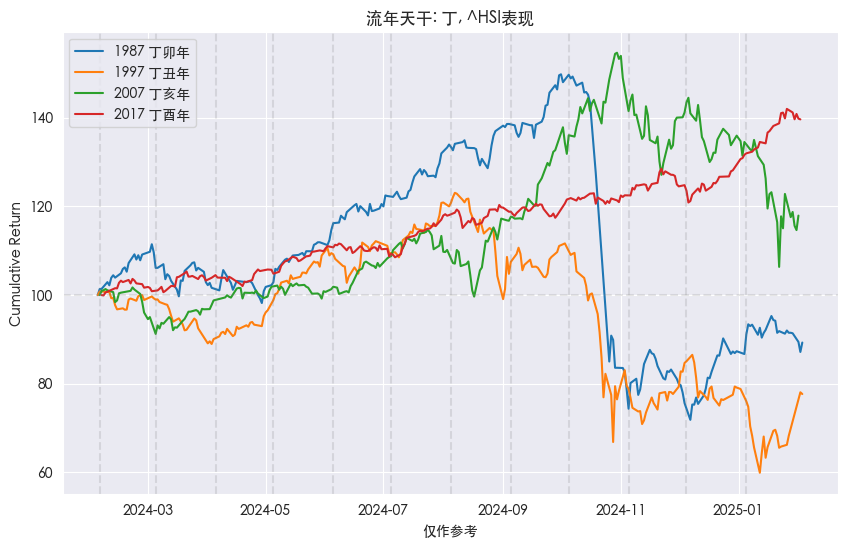

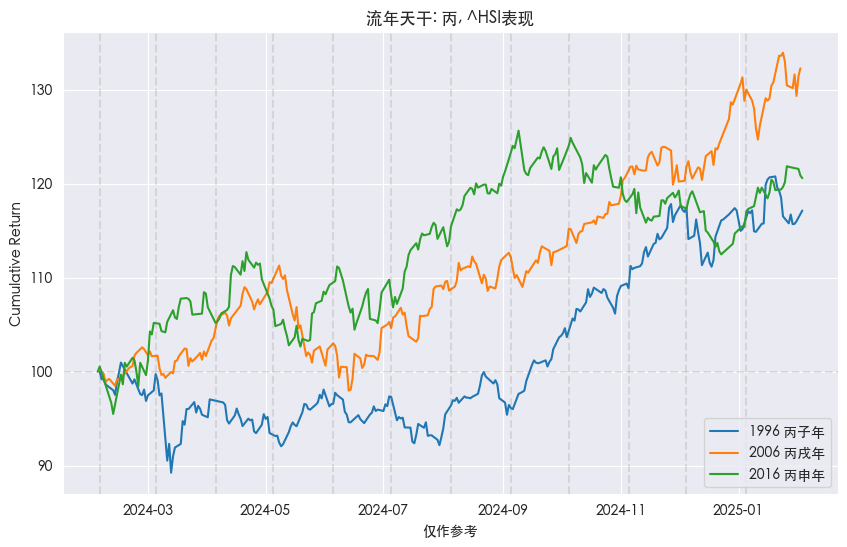

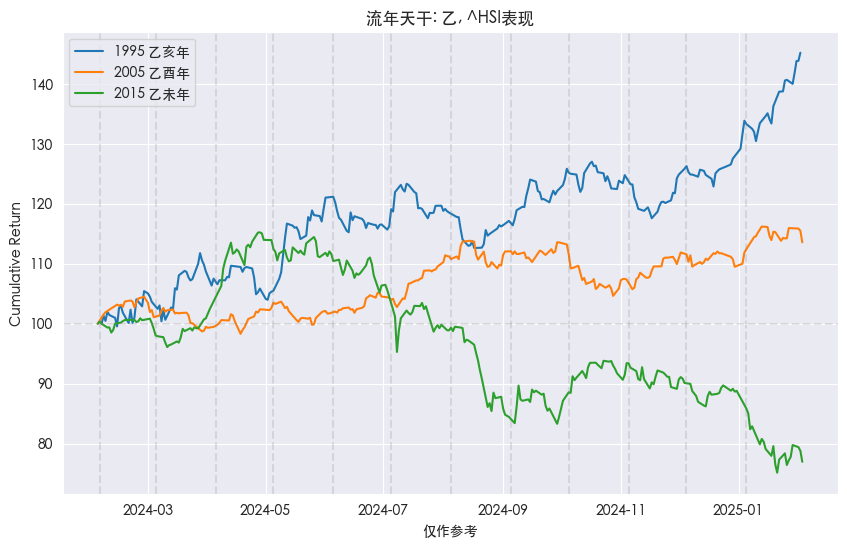

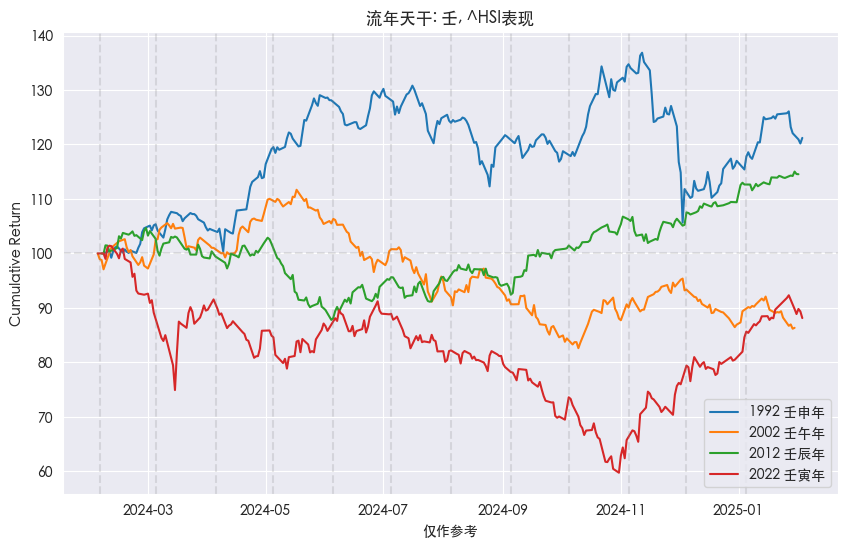

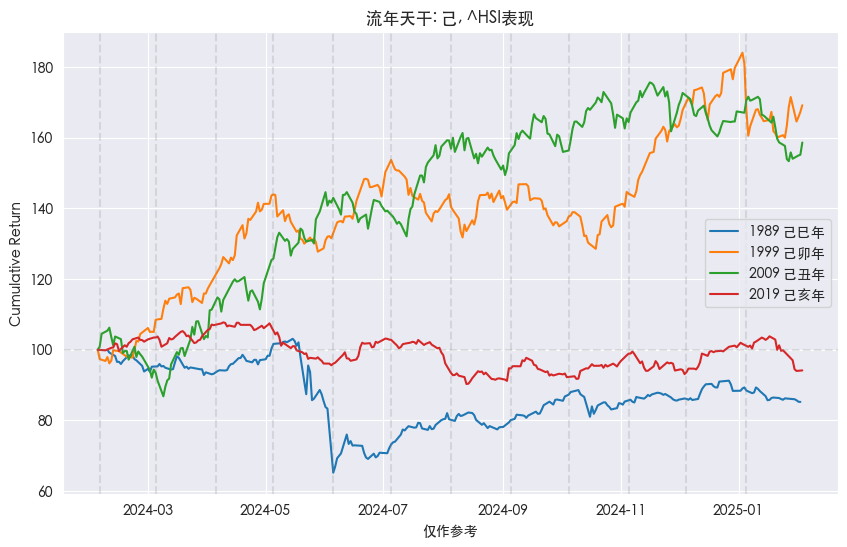

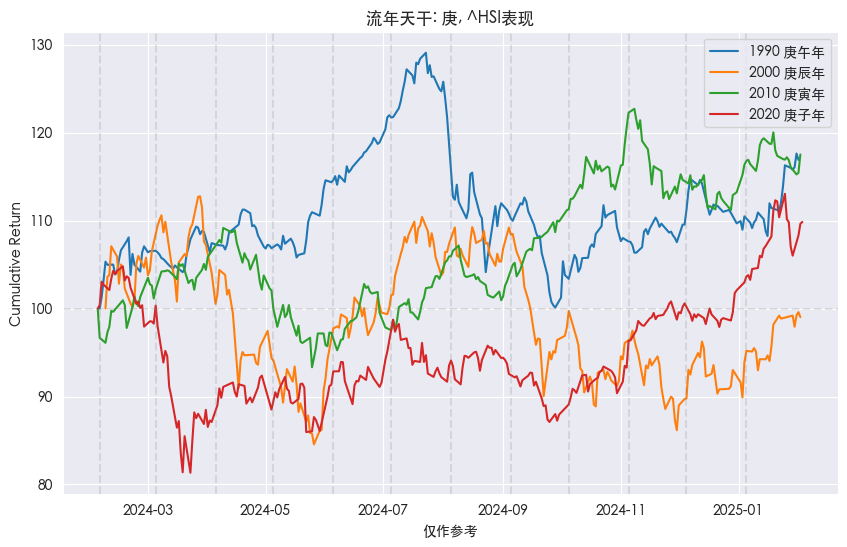

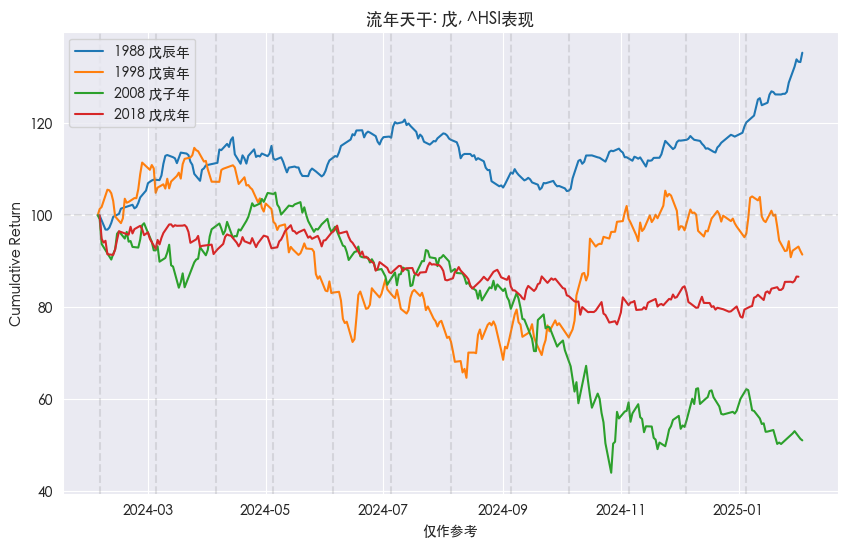

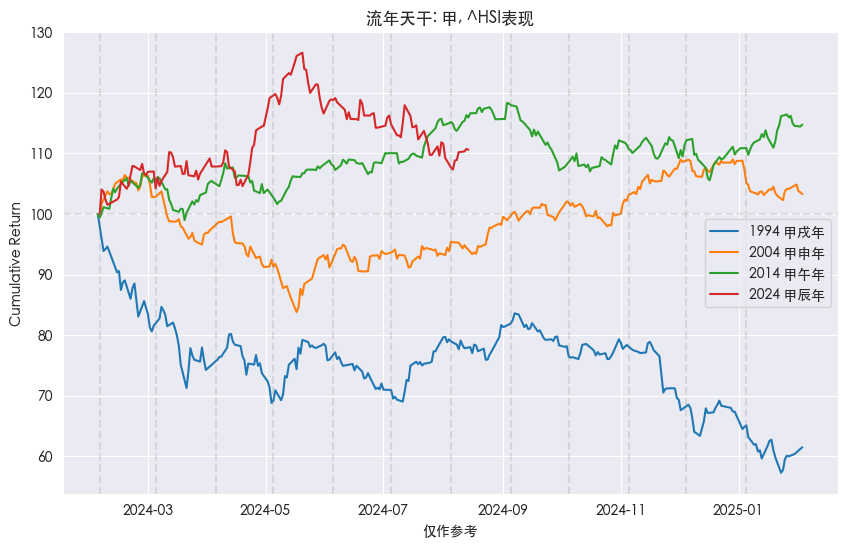

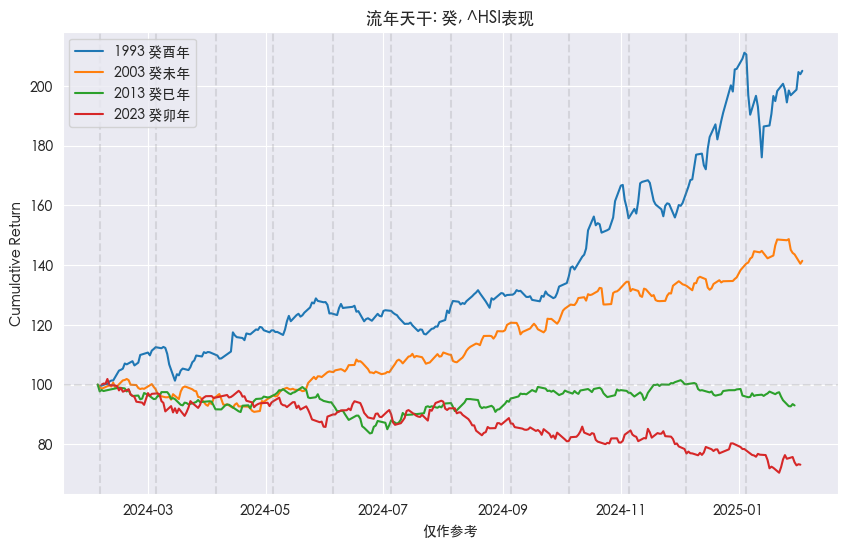

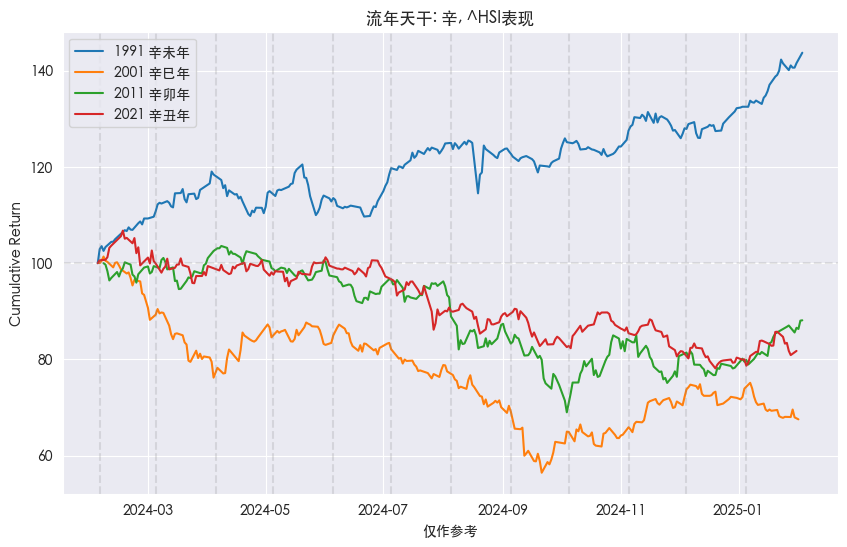

In [13]:
stock_bazi = stock_bazi[stock_bazi.index >= '1987-02-04']

for _df in stock_bazi.groupby('年干'): # only works for 60 years
    plt.figure(figsize=(10, 6))
    temp_df = _df[1]
    shapes = []
    temp_df['流年'] = temp_df['年干'] + temp_df['年支']
    for _df_1 in temp_df.groupby('Unique Year'):
        temp_df_1 = _df_1[1]['Price']
        temp_df_1.index = pd.to_datetime([
            f'2025-{d.month}-{d.day}' if _df_1[1]['月支'].loc[d] == '丑' or (_df_1[1]['月支'].loc[d] == '子' and d.month == 1)
            else f'2024-{d.month}-{d.day}' for d in temp_df_1.index
        ])
        temp_df_1 = temp_df_1 / temp_df_1.iloc[0]
        label_name = f'{_df_1[0]} {_df_1[1]["流年"].iloc[0]}年'
        plt.plot(100 * temp_df_1, label=label_name)
        shapes.append(temp_df_1.shape[0])
        
    months = ['寅', '卯', '辰', '巳', '午', '未', '申', '酉', '戌', '亥', '子', '丑', '寅']
    for m in range(1, 13):
        _date = f'2025-{m}-5' if m == 1 else f'2024-{m}-5'
        plt.axvline(pd.to_datetime(_date), linestyle='--', color='grey', alpha=0.2)
    
    plt.axhline(100, linestyle='--', color='grey', alpha=0.2)
    plt.legend()
    plt.title(f'流年天干: {_df[0]}, {name}表现')
    plt.xlabel('仅作参考')
    plt.ylabel('Cumulative Return')
    plt.show()

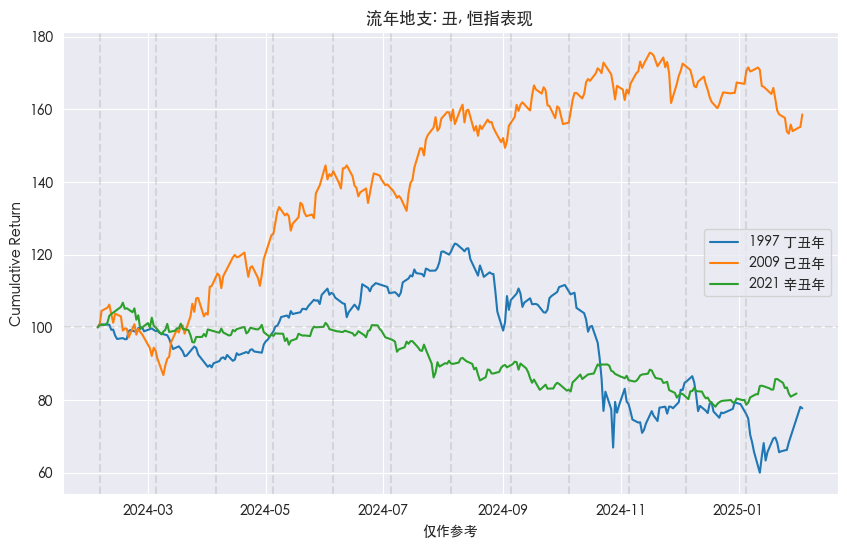

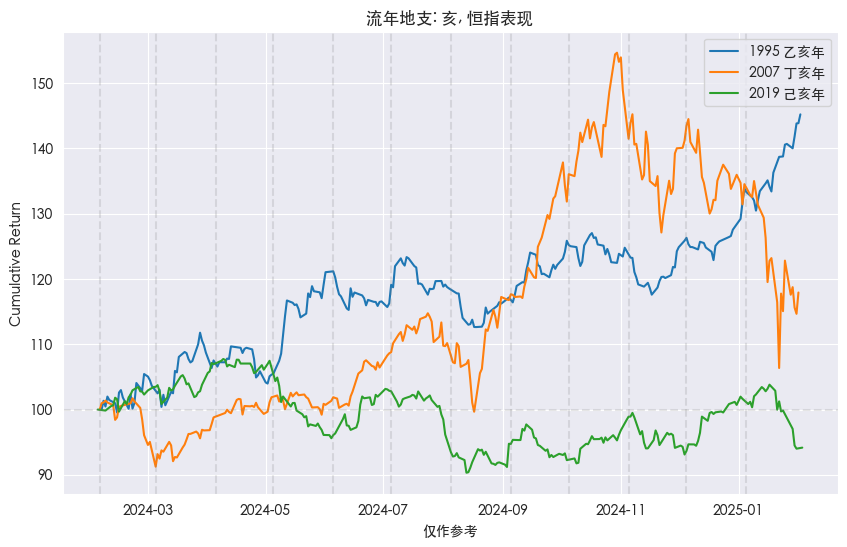

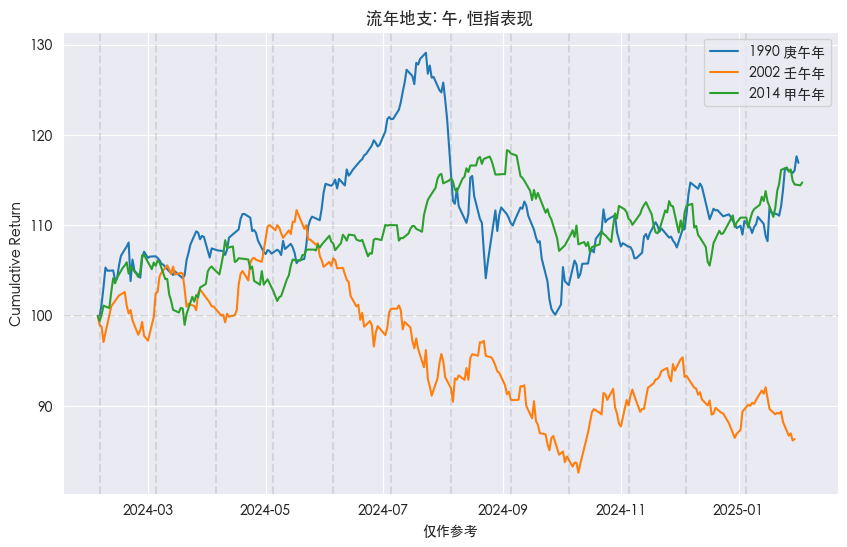

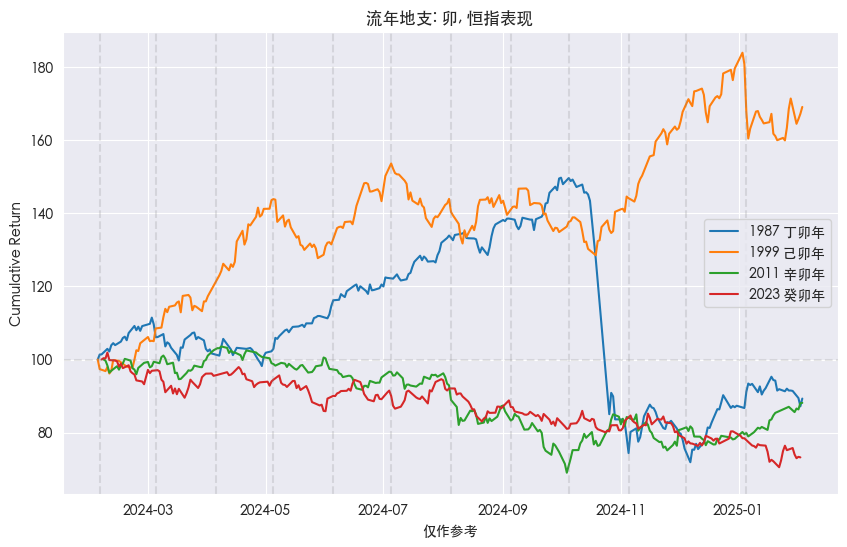

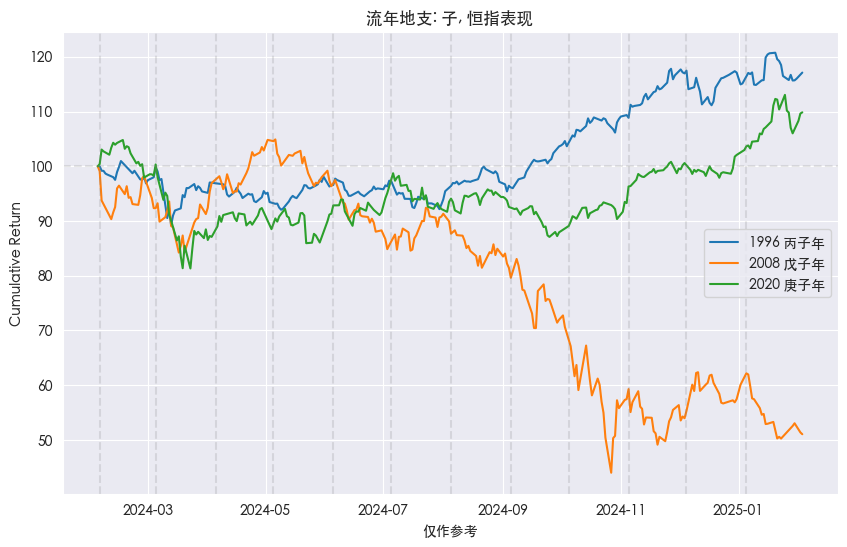

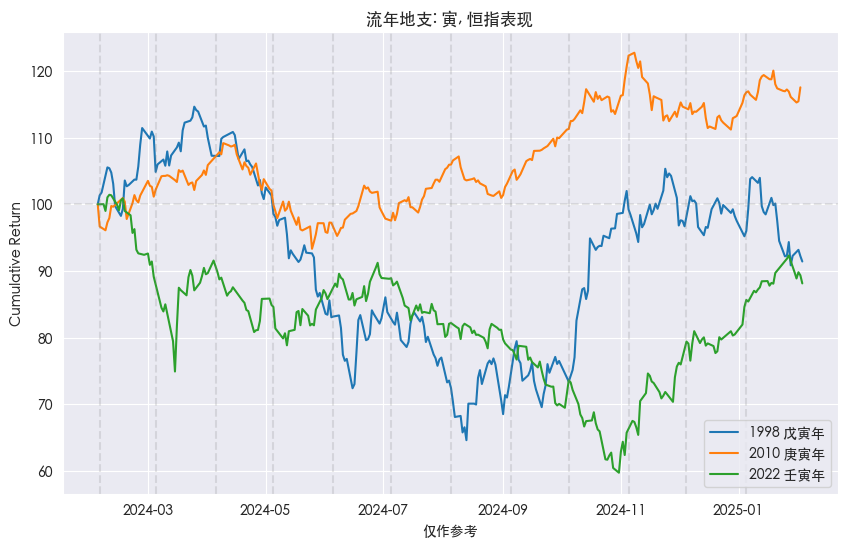

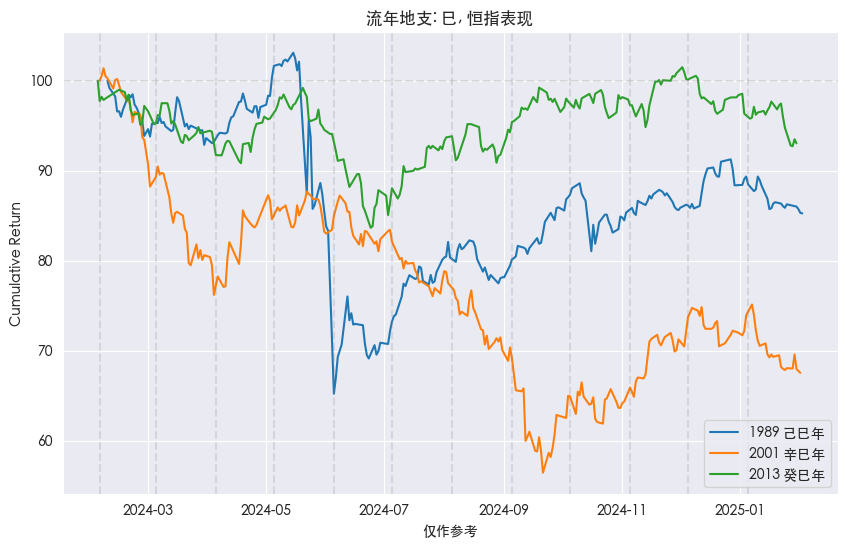

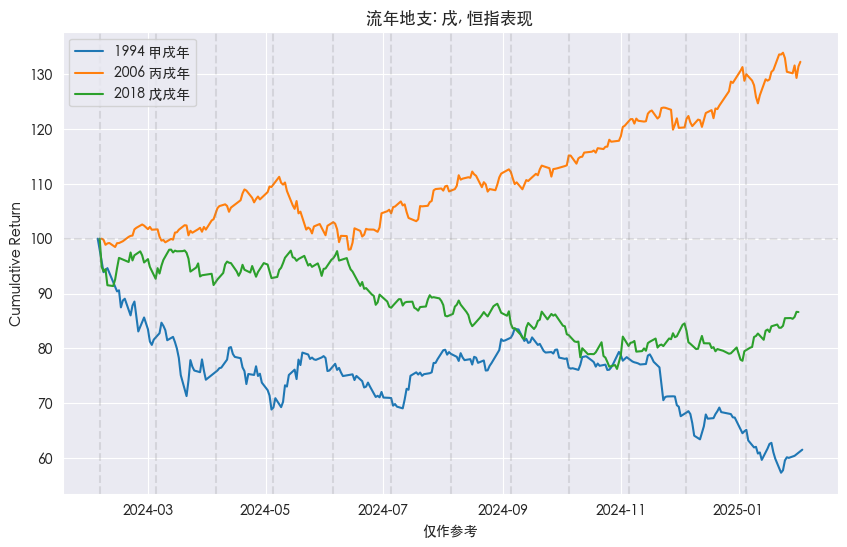

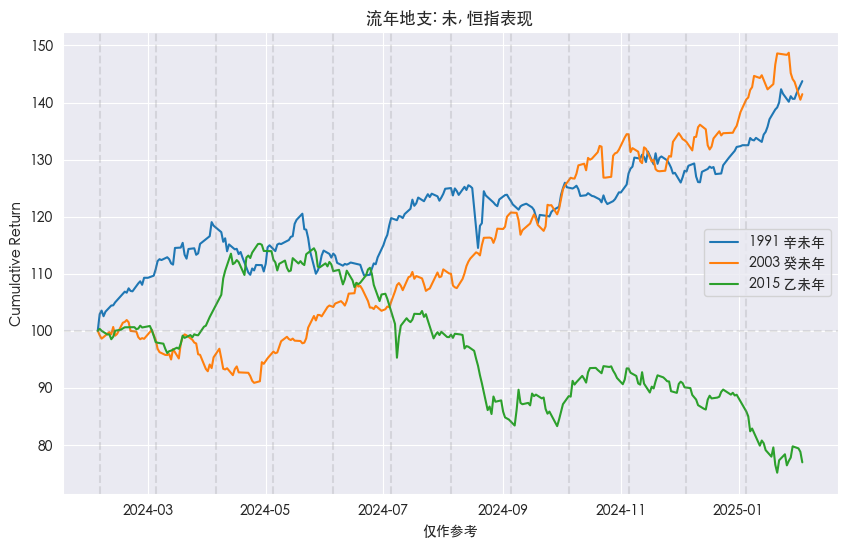

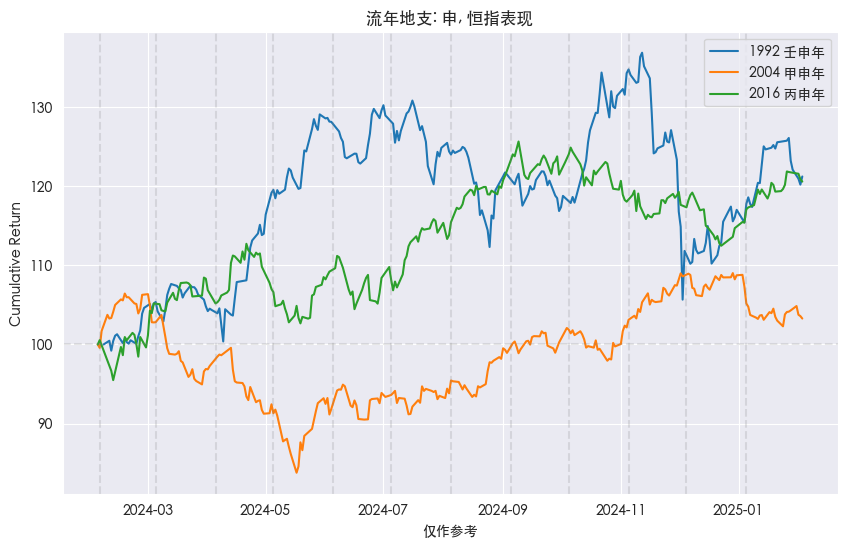

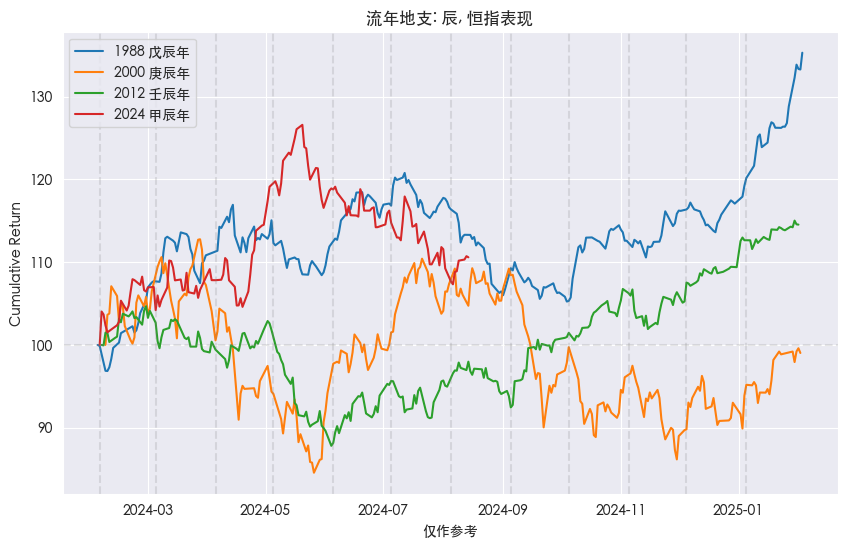

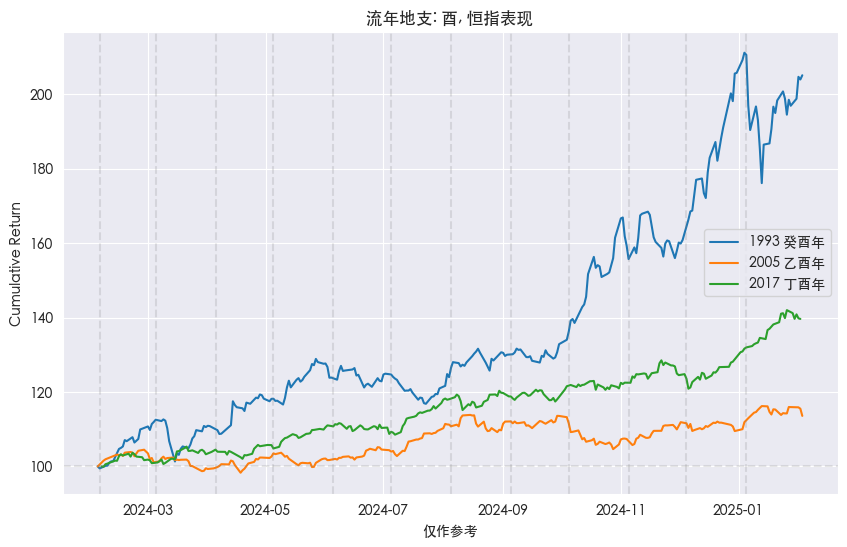

In [14]:
stock_bazi = stock_bazi[stock_bazi.index >= '1987-02-04']

for _df in stock_bazi.groupby('年支'): # only works for 60 years
    plt.figure(figsize=(10, 6))
    temp_df = _df[1]
    shapes = []
    temp_df['流年'] = temp_df['年干'] + temp_df['年支']
    for _df_1 in temp_df.groupby('Unique Year'):
        temp_df_1 = _df_1[1]['Price']
        temp_df_1.index = pd.to_datetime([
            f'2025-{d.month}-{d.day}' if _df_1[1]['月支'].loc[d] == '丑' or (_df_1[1]['月支'].loc[d] == '子' and d.month == 1)
            else f'2024-{d.month}-{d.day}' for d in temp_df_1.index
        ])
        temp_df_1 = temp_df_1 / temp_df_1.iloc[0]
        label_name = f'{_df_1[0]} {_df_1[1]["流年"].iloc[0]}年'
        plt.plot(100 * temp_df_1, label=label_name)

        # plt.plot(range(temp_df_1.shape[0]), (100 * temp_df_1).values.tolist(), label=label_name)
        shapes.append(temp_df_1.shape[0])
        
    months = ['寅', '卯', '辰', '巳', '午', '未', '申', '酉', '戌', '亥', '子', '丑', '寅']
    for m in range(1, 13):
        _date = f'2025-{m}-5' if m == 1 else f'2024-{m}-5'
        plt.axvline(pd.to_datetime(_date), linestyle='--', color='grey', alpha=0.2)
        # plt.text(pd.to_datetime(_date), 0, months[m - 1])
    
    plt.axhline(100, linestyle='--', color='grey', alpha=0.2)
    plt.legend()
    plt.title(f'流年地支: {_df[0]}, 恒指表现')
    plt.xlabel('仅作参考')
    plt.ylabel('Cumulative Return')
    plt.show()